# A supervised machine learning to predict forest fires using meteorological factors 

In this python project, I will evaluate the performance and predictive power of  models that have been trained and tested on data collected from Montesinho Park in Portugal. The dataset for this project originates from the UCL machine learning repository. The *forestfires* data was collected in 1981 and each of the 517 entries represent aggregated data of about 12 features. The features comprises four meteorological factors, geospatial attributes of the location (X and Y), four measures of weather conditions, as well as temporal variables namely day and month. The purpose of this project is to predict the area burned during the forest fires.

### The modelling approach

This is a regression task where the aim is to predict burned areas of forest fires. We will make use a variety of machine learning algorithms and properly evaluate the quality of each method by cross validation. We will go through the various algorithms like linear regression, random forest, and artificial neural network.

### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

### **Importing the forestfires dataset**

We are importing the datasets that contain variables collected by the meterological station

In [2]:
# import forestfires dataset 
forestfires = pd.read_csv("forestfires.csv")

### **Data exploration**

In this section of the forest fires ML project, we will explore the data in the data frame. We will be displaying the data using the head(), describe() as well as the tail() functions. Then we will further explore the other parts of the dataframe.

In [3]:
forestfires.head(n = 6)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


from a sample of forest fires data, we can see various features:

* **area**: Total burned area (in ha) 
* **X**:    X-axis coordinate (from 1 to 9)
* **Y**:    Y-axis coordinate (from 1 to 9)
* **month**: Month of the year (January to December)
* **day**:  Day of the week (Monday to Sunday)
* **FFMC**: Fuel Moisture Code 
* **DMC**:  Diff Moisture Code
* **DC**:   Drought Code
* **ISI**:  Initial spread index
* **temp**: Outside temperature (in degree celsius)
* **RH**:   Outside relative humidity (in %)
* **wind**: Outside wind speed (in km/h)
* **rain**: Outside rain (in mm/m2)

since I am interested in the target of the burned area, I can create a separate variable and store the **area** variable on its own.

In [4]:
forestfires.tail(6)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In this section of data exploration, we decided to explore the summary statistics of the response variable to give us a better insight about the distribution.

In [5]:
forestfires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


**Checking the missing numbers**

Inspecting the dataset to check for any missing values as if there seems, it would affect the result of the model.

In [6]:
forestfires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Univariate analysis

Text(0.5, 1.0, 'Box plot of the burned area')

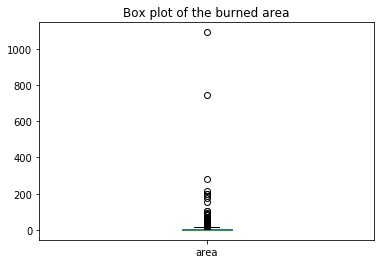

In [7]:
forestfires.area.plot.box()
plt.title("Box plot of the burned area")

Text(0.5, 1.0, 'Histogram of the burned area')

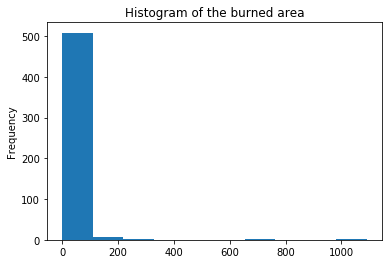

In [8]:
forestfires.area.plot.hist(bins = 10)
plt.title("Histogram of the burned area")

The two plots indicate that the data is highly skewed and that majority of forest fires cover a smaller area (under 100 hectares of land). Also, there are outliers in the area feature.

### Bivariate analysis

Text(0.5, 1.0, 'Area burned by each month')

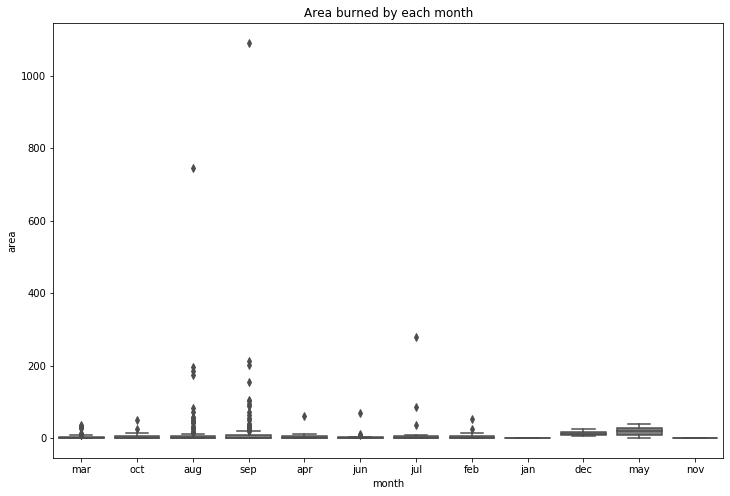

In [9]:
# Let take a look at the categorical variables
# visualizing month and day with the areas burned
plt.figure(figsize=(12,8))
sns.boxplot(x = "month", y = "area", data = forestfires, color = 'grey')
plt.title("Area burned by each month")

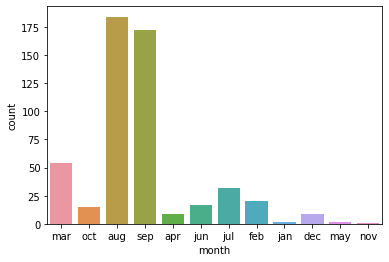

In [10]:
sns.countplot(x = 'month', data = forestfires)

Text(0.5, 1.0, 'Area burned by each day')

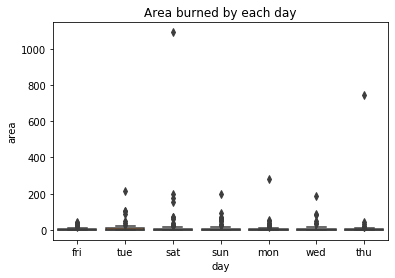

In [11]:
sns.boxplot(x = 'day', y = 'area', data = forestfires)
plt.title("Area burned by each day")

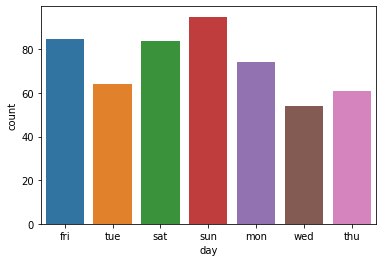

In [12]:
sns.countplot(x = 'day', data = forestfires)

**Few observations from the plots**

1. High number of forest fires occur in the month of August and September likely due to the weather as it is in summer period
2. Higher proportion of the outbreak happens in the weekends. We could speculate that this may be due to more people at the park during the weekends

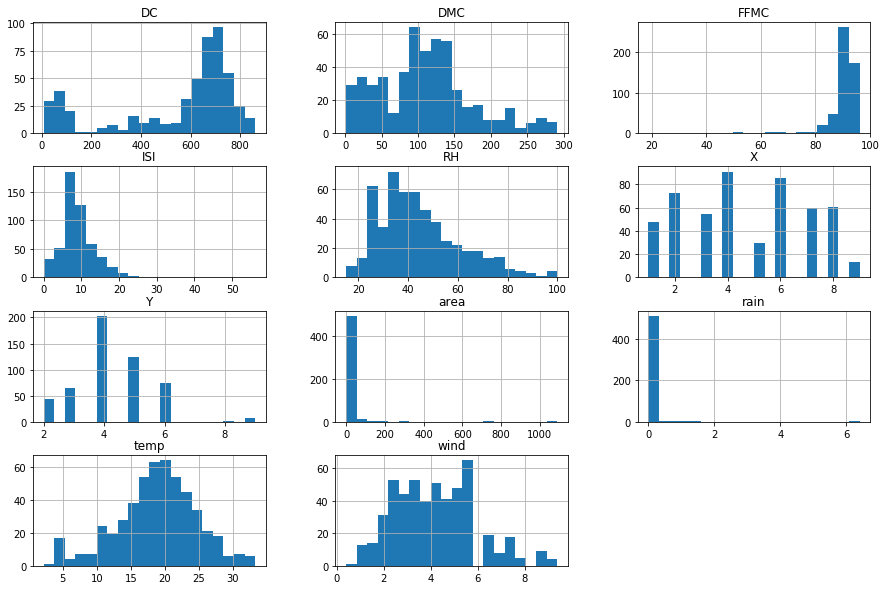

In [14]:
# visualizing the distribution of the dataset with histogram
forestfires.hist(bins = 20, figsize =(15,10))
plt.show()

### Multivariate analysis

In this part, I am going to create pairplot by showing the relationship between area burned and the features. By selecting the features will help to have a clearer visualization.

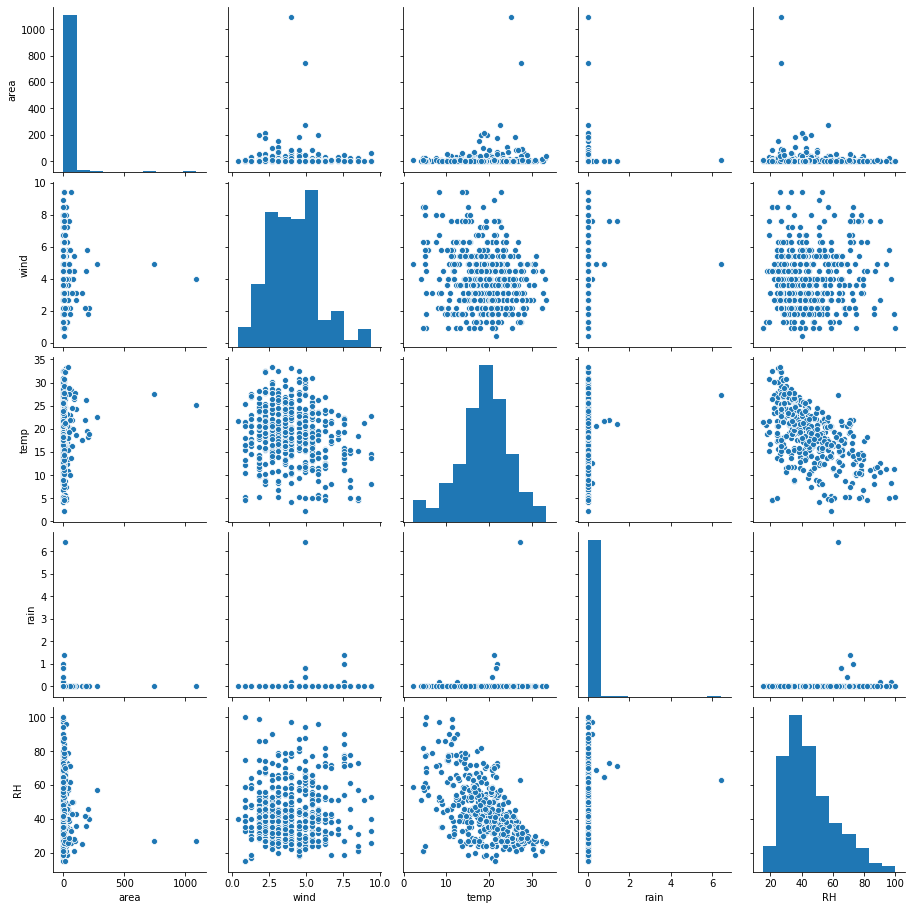

In [15]:
# Viauslaizing the area in relation to weather conditons
sns.pairplot(forestfires, vars = ["area","wind","temp", "rain", "RH"])
plt.show()

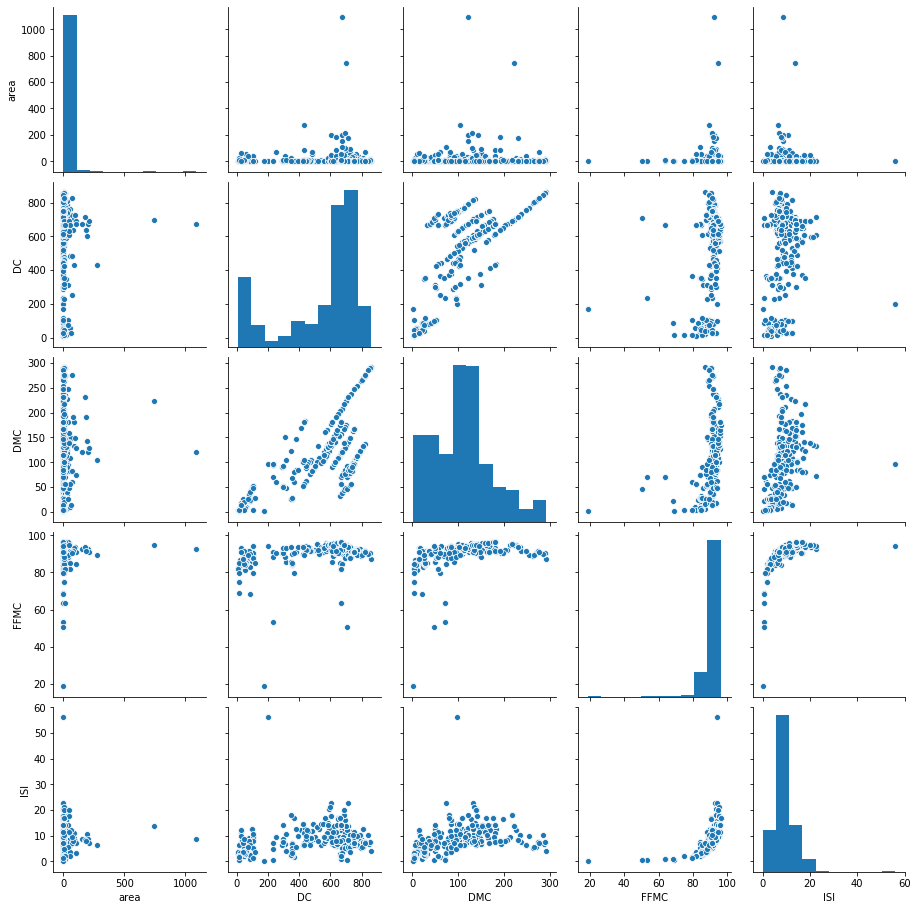

In [16]:
sns.pairplot(forestfires, vars = ["area","DC","DMC", "FFMC", "ISI"])
plt.show()

In [17]:
# Correlation matrix
corr_matrix = forestfires.corr(method = 'pearson')
corr_matrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


Temperature has the strongest positive correlation with the burned area, followed by relative humidity (RH). Rain has the stongest negative correlation.

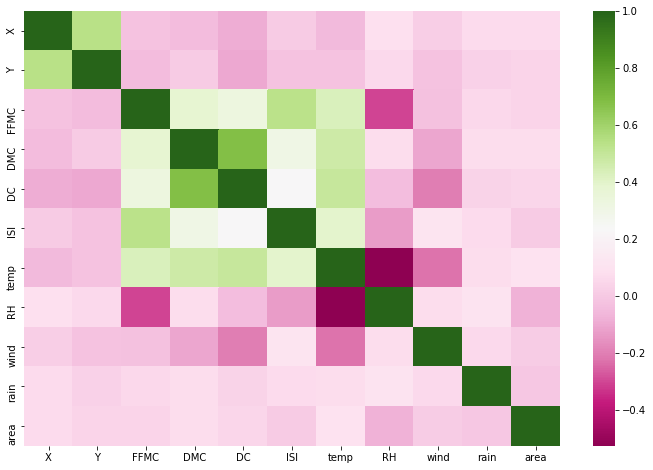

In [18]:
ax = plt.figure(figsize = (12,8))
ax = sns.heatmap(corr_matrix, cmap = 'PiYG')

The chart shows the relationship between the variables using the colour to denote the strength of the correlation. The green and red means positive and negative respectively. Most of the variables are correlated with each other.

In [19]:
# Checking the target outlier
from scipy.stats import zscore
area_outliers = forestfires[abs(zscore(forestfires['area'])) >= 3]
area_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


The above outliers are not error values so i will decide to drop it or not.

In [20]:
# Selecting the dependent and explnatory variables 
features = forestfires.iloc[:,:-1]
target = forestfires.iloc[:,-1]

### Data manipulation

In this section of the python project, we will need to inspect the data to know if they are structured in a common data type. For this dataset, we have two categorical variables and the rules of machine learning project especially when dealing with regression task, all the variables must be numeric. Hence, onehotencoder will be introduced to convert the categorical varibales to numerical values, thereby giving us a better structured data.

**One Hot Encoder**

Machine learning models require all the input and output values variables to be numeric. So, the two categorical variables must be encoded to numbers before fitting the model and evaluating a model.

In this section, introduced one hot encoder to convert categorical data to numerical values since it eliminates the ordering relationship.

In [21]:
# Encoding Categorical data 
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
features['day_cat'] = labelencoder.fit_transform(features['day'])

# creating instance of onehotencoder
day_cat = ('mon','tue','wed','thur','fri','sat','sun')
onehotencoder = OneHotEncoder()
encoding = onehotencoder.fit_transform(features[['day_cat']]).toarray()

encoding = pd.DataFrame(encoding, columns = day_cat)
features = features.join(encoding)
features.drop(columns=['day','day_cat'], inplace = True)
features

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,mon,tue,wed,thur,fri,sat,sun
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,2,4,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,7,4,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,1,4,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
# Encoding Categorical data 
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
features['month_cat'] = labelencoder.fit_transform(features['month'])


# creating instance of onehotencoder
month_cat = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')
onehotencoder = OneHotEncoder()
encoding = onehotencoder.fit_transform(features[['month_cat']]).toarray()

encoding = pd.DataFrame(encoding, columns =  month_cat)
features = features.join(encoding)

In [23]:
features.drop(columns=['month','month_cat'], inplace = True)
features

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# checking the explanatory variables
features.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Developing a model**

In the section of the project, I will make use of machine learning to create models and predictions. In machine learning, validation approach is done by splitting the dataset into two parts which are training set and testing set. This is useful to fit a model on the training data and evaluate on the test data.

For the code below, 
* The data into 80% training and 20% testing 
* set the random_state for the split to a value of my choice.
* Assign the train and test splits to X-train, X_test, Y_train and Y_test

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

In [26]:
print("Train", X_train.shape,Y_train.shape)
print("Test", X_test.shape,Y_test.shape)

Train (413, 29) (413,)
Test (104, 29) (104,)


**Training and evaluating models**

Next I apply four algorithms that are approriate for this problem considering the nature of the data. I will fit the model on the training data for each of the algorithms, make predictions on the testing data, and evaluate the perfomance on the test set

The following supervised methods are used:
* Linear regression
* Decision tree
* Random forest
* Neural network


### Linear regression

We will start with linear regression. Linear regression is useful for modelling a continuous values of response. It is simple and easy to interpret. We will proceed to implement this model on our train data as follows:

In [27]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model coefficients and intercept**

In [28]:
regressor.intercept_

4.197368033008583

In [29]:
list(zip(features,regressor.coef_))

[('X', 1.3186597251613246),
 ('Y', 0.8914590506388318),
 ('FFMC', -0.06347482660269423),
 ('DMC', 0.16831262891074408),
 ('DC', -0.07101203522007034),
 ('ISI', -0.128432135414622),
 ('temp', 0.8708292956815318),
 ('RH', -0.08437653739389203),
 ('wind', 1.1525167624916488),
 ('rain', -2.3572055417916933),
 ('mon', -4.675367916931996),
 ('tue', 0.9700380409051027),
 ('wed', 0.5928274570311164),
 ('thur', -3.4867021526333937),
 ('fri', 5.332762723657253),
 ('sat', 1.2186959238657271),
 ('sun', 0.047745924105943804),
 ('jan', -10.661669576568054),
 ('feb', 5.242254375375254),
 ('mar', 14.413630003422208),
 ('apr', -3.7889079994497745),
 ('may', -0.688006157944102),
 ('jun', 1.2010775126785087),
 ('jul', -16.074585874592625),
 ('aug', -16.77837769198307),
 ('sep', 2.990391635766305),
 ('oct', -16.589267585685523),
 ('nov', 22.761755872693048),
 ('dec', 17.971705486287473)]

**Interpreting the regression coefficients** 

* An increase of a variable tend to be associated with an increase in the area. For example, a unit increase in DMC is associated with a 0.87 unit increase in area. 
* Note that the coefficients represents associations not causations

 **Making predictions**
 
Once a model has been trained on a given set of data, it can now be used to make predictions on the test data.

In [30]:
# make prediction  on the testing data
regressor_pred = regressor.predict(X_test)

**Decision Tree**

Decision tree is a linear model that builds regression models in the form of a tree struture. Decision regresion tree normally use mean squared error (MSE) to split a node into two or more sub-nodes.

In [31]:
DT = DecisionTreeRegressor(criterion = 'mse', splitter = 'best')
DT.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
DT_pred = DT.predict(X_test)

**Random Forest model**

Random forest is an ensemble learning that aggregates several trees to make a prediction. I introduced the algortithm to limit the overfitting in decision tree as well as reduce the regression error.

Creating a random forest model to fit the training data using default number of trees. ntree = 500. 

In [33]:
# Random forest Regression
# random forest model with ntree = 500
rf = RandomForestRegressor(n_estimators = 500, criterion ="mse", random_state = 0)
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:
# making predictions with the model
rf_pred = rf.predict(X_test)

**Neural Network**

This is an aspect of deep learning used for regression and classsification tasks. I performed feature scaling on the dataset as to have a common unit. The features are the input layers which predicts the output layer (burned area). With neural networks we use something more complicated called stochastic gradient descent which is not necessary to be understood to minimize the loss function.

In [35]:
#  Neural Network
#  feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
from sklearn.neural_network import MLPRegressor
neural = MLPRegressor(hidden_layer_sizes = (29,29,29), activation ='relu', solver ='adam', max_iter = 200)
neural.fit(X_train,Y_train)

C:\Users\laptop2\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(29, 29, 29), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [37]:
# making neural predictions 
predict_neural = neural.predict(X_test)

**Analyzing Model Performance**

In machine learning, analyzing the quality of a model is very vital. I will compare the methods using the same performance metrics:
* mean absolute error
* mean square error
* root mean square error
A model with less error is the best predictive model. In the code below, i will demonstrate the three common performance metrics

In [38]:
# For linear regression
# evaluating the model performance metrics and the score
print("lm_MAE: ", metrics.mean_absolute_error(Y_test,regressor_pred))
print("lm_MSE: ", metrics.mean_squared_error(Y_test,regressor_pred))
print("lm_RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,regressor_pred)))

lm_MAE:  26.267417524206316
lm_MSE:  11947.54428221357
lm_RMSE:  109.3048227765526


In [39]:
# For Decision Tree
# evaluating the model performance metrics and the score
print("MAE: ", metrics.mean_absolute_error(Y_test,DT_pred))
print("MSE: ", metrics.mean_squared_error(Y_test,DT_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,DT_pred)))

MAE:  39.45596153846154
MSE:  23042.61210192307
RMSE:  151.7979318104271


In [40]:
# For Random forest
# evaluating the model performance metrics and the accuracy
print("MAE:", metrics.mean_absolute_error(Y_test,rf_pred))
print("MSE:",  metrics.mean_squared_error(Y_test,rf_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test,rf_pred)))

MAE: 31.388313296703288
MSE: 13385.625069241469
RMSE: 115.69626212303261


In [41]:
# For neural network
# evaluating the model performance metrics and the accuracy
print("MAE: ", metrics.mean_absolute_error(Y_test,predict_neural))
print("MSE: ", metrics.mean_squared_error(Y_test,predict_neural))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,predict_neural)))

MAE:  26.901936448939402
MSE:  11805.33957427881
RMSE:  108.65237951503322


 **Comparing models by cross validation**
 
A more robust way to evaluate model perfromance is cross validation. K-fold croos validation is introduced to produce more reliable estimate performance than the validation approach. This approach split the whole dataset into K "folds":

* Each fold acts as the testing data and acts as the training data K-1 times
* Iterate till the whole K folds serves as a testing data 
* Calculate the error in each of the K folds
* Average the testing performance which results to the cross-validated perormance.

In machine learning, K = 10 is generally reccommneded for cross validation and I am applying it to this project.

In [42]:
# for linear regression 
# 10-fold cross validation with all the features for linear regression
regressor = LinearRegression()
# use the cross_val_score function
# passing the whole forest fires dataset for splitting
# scoring = "mean_squared_error" for regression evaluation metric as accuracy cannot be used since its only relevant
# for classification tasks.
score = cross_val_score(regressor, features, target, cv = 10, scoring = "neg_mean_squared_error")
mse_scores = score
mse_scores

array([  -786.60014796,   -360.27411859,   -430.51114529,   -257.41362898,
       -26427.30888855,   -378.42890327,   -290.10360579,   -958.84740439,
       -11503.86151402,  -2015.13414626])

MSE is a loss function and should be positive because we are trying to minimize the sum of squares of residuals but the MSE gotten is negative. So, we have to multiply by -1

In [43]:
# fixing the sign 
lm_mse_scores = -mse_scores
lm_mse = lm_mse_scores.mean()
lm_mse

4340.848350309547

In [45]:
# calculate the average RMSE
lm_RMSE = np.sqrt(lm_mse)
lm_RMSE

65.88511478558375

In [46]:
# for Decision Tree
# 10-fold cross validation with all the features
DT = DecisionTreeRegressor()
score = cross_val_score(DT, features, target, cv = 10, scoring = "neg_mean_squared_error")
DT_mse_scores = -score
DT_mse = DT_mse_scores.mean()
DT_mse

12015.857589723793

In [47]:
# calculate the average RMSE
DT_RMSE = np.sqrt(DT_mse)
DT_RMSE

109.6168672683351

In [48]:
# for random forest
# 10-fold cross validation with all the features
rf = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 0)
score = cross_val_score(rf, features, target, cv = 10, scoring = "neg_mean_squared_error")
rf_mse_scores = -score
rf_mse = rf_mse_scores.mean()
rf_mse

5125.299171884222

In [49]:
# calculate the average RMSE
rf_RMSE = np.sqrt(rf_mse)
rf_RMSE

71.59119479296474

In [50]:
# neural network
# 10-fold cross validation with all the features
score = cross_val_score(neural, features, target, cv = 10, scoring = "neg_mean_squared_error")
nn_mse_scores = -score
nn_mse = nn_mse_scores.mean()
nn_mse

C:\Users\laptop2\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4137.0205603895065

In [51]:
# calculate the average RMSE
nn_RMSE = np.sqrt(nn_mse)
nn_RMSE

64.31967475344932

From the cross validation approach, I can conclude that neural network is likely the algorithm that produces a better predicitve model.

In [52]:
Algorithm = ["lm",'DT',"RF","NN"]
MSE = [4340.84,12015.86,5125.29,4137.02]
RMSE = [65.89,109.62,71.59,64.31]
data = ({"Algorithm":Algorithm,"MSE":MSE,"RMSE":RMSE})
df = pd.DataFrame(data, index = ["a","b","c","d"])

df.pivot("column", "group", "val").plot(kind='bar')

plt.show()

,Algorithm,MSE,RMSE
a,lm,4340.84,65.89
b,DT,12015.86,109.62
c,RF,5125.29,71.59
d,NN,4137.02,64.31


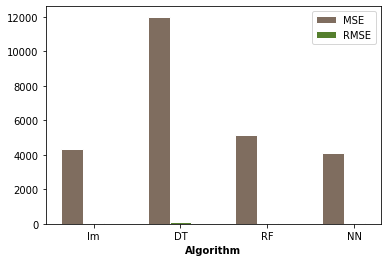

In [54]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [4340.84,12015.86,5125.29,4137.02]
bars2 = [65.89,109.62,71.59,64.31]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='RMSE')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['lm', 'DT', 'RF', 'NN'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

 **Conclusion**

Using the validation approach, I can see that the linear regression model perfoms better than decision tree, random forest, and neural network. However, it is important to note that this approach is prone to high variance estimate and the error may not be consistent when the dataset and model paramter changes. Hence, I have to use K-folds cross- validation to solve the problem because it is more stable.

Cross validation shows that neural network is slightly better than linear regression and way better than random forest in terms of root mean square (RMSE). Hence, I should go with neural network which gives a robust predictive performance. 
